# Agent for Single Cell RNAseq Analysis

# User Inputs

In [2]:
user_query = """Analyze this single cell RNA-seq data about Keloids. Identify
biomarkers from this dataset and discuss the relationship of these data to the
african american community."""
scrna_data_path = ".../data.h5ad"

# Download Papers

## Functions

In [3]:
"""
Generate search keywords from a user query using LangChain and OpenAI.
"""

from langchain.chat_models import ChatOpenAI
from langchain.schema import SystemMessage, HumanMessage
import os

def get_keywords_from_query(user_query: str, model_name="gpt-3.5-turbo", num_keywords=5) -> list:
    llm = ChatOpenAI(model=model_name, temperature=0.5)

    system_prompt = (
        "You are an assistant that converts user research questions into a short list of high-quality "
        "keywords for academic search (e.g., Semantic Scholar)."
    )
    user_prompt = (
        f"User query: {user_query}\n\n"
        f"Provide {num_keywords} short, relevant keywords or phrases separated by commas."
    )

    messages = [
        SystemMessage(content=system_prompt),
        HumanMessage(content=user_prompt)
    ]

    response = llm(messages)
    keyword_string = response.content.strip()

    # Split and clean keywords
    keywords = [kw.strip() for kw in keyword_string.split(",")]
    return keywords


In [4]:
"""
Search and download papers from Semantic Scholar.

Usage:
    python semantic_scholar_search.py "deep learning biology" 5 ./output/
"""

import requests
import os
import sys
import json
from tqdm import tqdm

BASE_URL = "https://api.semanticscholar.org/graph/v1/paper/search"

def search_semantic_scholar(query, limit=10):
    params = {
        "query": query,
        "limit": limit,
        "fields": "title,authors,abstract,url,year,externalIds,isOpenAccess,openAccessPdf"
    }
    response = requests.get(BASE_URL, params=params)
    response.raise_for_status()
    return response.json()["data"]

def save_metadata(papers, outdir):
    metadata_path = os.path.join(outdir, "papers_metadata.json")
    with open(metadata_path, "w") as f:
        json.dump(papers, f, indent=2)
    print(f"[+] Saved metadata to {metadata_path}")

def download_pdfs(papers, outdir):
    for i, paper in tqdm(enumerate(papers), desc="Downloading Papers"):
        pdf_url = paper.get("openAccessPdf", {}).get("url")
        if pdf_url:
            try:
                response = requests.get(pdf_url)
                response.raise_for_status()
                title = papers[0]['title'].replace(' ', '_').replace('.','_').replace('-','_').replace(',','_').replace(':','_')
                filename = f"{title}.pdf"
                filepath = os.path.join(outdir, filename)
                with open(filepath, "wb") as f:
                    f.write(response.content)
                print(f"[+] Downloaded: {filename}")
            except Exception as e:
                print(f"[!] Failed to download paper {i+1}: {e}")
        else:
            print(f"[!] No open access PDF for paper {i+1}")


## Constants

In [9]:
output_dir = "downloads" # Loacation where papers will be downloaded to
num_papers = 25          # Number of papers per downlowd

## Script

In [10]:
keywords

['Single cell RNA-seq',
 'Keloids',
 'Biomarkers',
 'African American community',
 'Relationship']

In [12]:
os.makedirs(output_dir, exist_ok=True)
keywords = get_keywords_from_query(user_query)
for keyword in tqdm(keywords, desc="Keywords"):
    papers = search_semantic_scholar(keyword, num_papers)
    save_metadata(papers, output_dir)
    download_pdfs(papers, output_dir)

Keywords:   0%|          | 0/5 [00:00<?, ?it/s]

[+] Saved metadata to downloads/papers_metadata.json


[+] Downloaded: Normalization_and_variance_stabilization_of_single_cell_RNA_seq_data_using_regularized_negative_binomial_regression.pdf


[+] Downloaded: Normalization_and_variance_stabilization_of_single_cell_RNA_seq_data_using_regularized_negative_binomial_regression.pdf


[+] Downloaded: Normalization_and_variance_stabilization_of_single_cell_RNA_seq_data_using_regularized_negative_binomial_regression.pdf


[+] Downloaded: Normalization_and_variance_stabilization_of_single_cell_RNA_seq_data_using_regularized_negative_binomial_regression.pdf


[+] Downloaded: Normalization_and_variance_stabilization_of_single_cell_RNA_seq_data_using_regularized_negative_binomial_regression.pdf


[+] Downloaded: Normalization_and_variance_stabilization_of_single_cell_RNA_seq_data_using_regularized_negative_binomial_regression.pdf


[+] Downloaded: Normalization_and_variance_stabilization_of_single_cell_RNA_seq_data_using_regularized_negative_binomial_regression.pdf


[+] Downloaded: Normalization_and_variance_stabilization_of_single_cell_RNA_seq_data_using_regularized_negative_binomial_regression.pdf


[+] Downloaded: Normalization_and_variance_stabilization_of_single_cell_RNA_seq_data_using_regularized_negative_binomial_regression.pdf
[!] No open access PDF for paper 10


[+] Downloaded: Normalization_and_variance_stabilization_of_single_cell_RNA_seq_data_using_regularized_negative_binomial_regression.pdf


[+] Downloaded: Normalization_and_variance_stabilization_of_single_cell_RNA_seq_data_using_regularized_negative_binomial_regression.pdf


[+] Downloaded: Normalization_and_variance_stabilization_of_single_cell_RNA_seq_data_using_regularized_negative_binomial_regression.pdf


[+] Downloaded: Normalization_and_variance_stabilization_of_single_cell_RNA_seq_data_using_regularized_negative_binomial_regression.pdf


[+] Downloaded: Normalization_and_variance_stabilization_of_single_cell_RNA_seq_data_using_regularized_negative_binomial_regression.pdf


[+] Downloaded: Normalization_and_variance_stabilization_of_single_cell_RNA_seq_data_using_regularized_negative_binomial_regression.pdf


[+] Downloaded: Normalization_and_variance_stabilization_of_single_cell_RNA_seq_data_using_regularized_negative_binomial_regression.pdf
[!] No open access PDF for paper 18


[+] Downloaded: Normalization_and_variance_stabilization_of_single_cell_RNA_seq_data_using_regularized_negative_binomial_regression.pdf


[+] Downloaded: Normalization_and_variance_stabilization_of_single_cell_RNA_seq_data_using_regularized_negative_binomial_regression.pdf
[!] No open access PDF for paper 21
[!] No open access PDF for paper 22


[+] Downloaded: Normalization_and_variance_stabilization_of_single_cell_RNA_seq_data_using_regularized_negative_binomial_regression.pdf


[+] Downloaded: Normalization_and_variance_stabilization_of_single_cell_RNA_seq_data_using_regularized_negative_binomial_regression.pdf



Keywords:  20%|██        | 1/5 [02:23<09:34, 143.55s/it]

[!] Failed to download paper 25: 403 Client Error: Forbidden for url: https://pmc.ncbi.nlm.nih.gov/articles/PMC5465819
[+] Saved metadata to downloads/papers_metadata.json


[!] No open access PDF for paper 1
[!] Failed to download paper 2: 403 Client Error: Forbidden for url: https://journals.lww.com/10.1097/PRS.0000000000008667
[!] No open access PDF for paper 3


[!] Failed to download paper 4: 403 Client Error: Forbidden for url: https://pmc.ncbi.nlm.nih.gov/articles/PMC8975835


[+] Downloaded: Hypertrophic_Scars_and_Keloids__Advances_in_Treatment_and_Review_of_Established_Therapies.pdf


[!] Failed to download paper 6: 403 Client Error: Forbidden for url: https://pmc.ncbi.nlm.nih.gov/articles/PMC9797913


[!] Failed to download paper 7: 403 Client Error: Forbidden for url: https://journals.lww.com/10.1097/CM9.0000000000002093
[!] No open access PDF for paper 8
[!] Failed to download paper 9: 403 Client Error: Forbidden for url: https://onlinelibrary.wiley.com/doi/pdfdirect/10.1111/exd.14121


[+] Downloaded: Hypertrophic_Scars_and_Keloids__Advances_in_Treatment_and_Review_of_Established_Therapies.pdf


[+] Downloaded: Hypertrophic_Scars_and_Keloids__Advances_in_Treatment_and_Review_of_Established_Therapies.pdf


[!] Failed to download paper 12: 403 Client Error: Forbidden for url: https://pmc.ncbi.nlm.nih.gov/articles/PMC7940466


[+] Downloaded: Hypertrophic_Scars_and_Keloids__Advances_in_Treatment_and_Review_of_Established_Therapies.pdf


[+] Downloaded: Hypertrophic_Scars_and_Keloids__Advances_in_Treatment_and_Review_of_Established_Therapies.pdf
[!] Failed to download paper 15: 403 Client Error: Forbidden for url: https://onlinelibrary.wiley.com/doi/pdfdirect/10.1111/exd.14414


[+] Downloaded: Hypertrophic_Scars_and_Keloids__Advances_in_Treatment_and_Review_of_Established_Therapies.pdf


[+] Downloaded: Hypertrophic_Scars_and_Keloids__Advances_in_Treatment_and_Review_of_Established_Therapies.pdf


[+] Downloaded: Hypertrophic_Scars_and_Keloids__Advances_in_Treatment_and_Review_of_Established_Therapies.pdf


[+] Downloaded: Hypertrophic_Scars_and_Keloids__Advances_in_Treatment_and_Review_of_Established_Therapies.pdf
[!] No open access PDF for paper 20


[+] Downloaded: Hypertrophic_Scars_and_Keloids__Advances_in_Treatment_and_Review_of_Established_Therapies.pdf


[+] Downloaded: Hypertrophic_Scars_and_Keloids__Advances_in_Treatment_and_Review_of_Established_Therapies.pdf


[+] Downloaded: Hypertrophic_Scars_and_Keloids__Advances_in_Treatment_and_Review_of_Established_Therapies.pdf


[+] Downloaded: Hypertrophic_Scars_and_Keloids__Advances_in_Treatment_and_Review_of_Established_Therapies.pdf



Keywords:  40%|████      | 2/5 [02:52<03:47, 75.97s/it] 

[+] Downloaded: Hypertrophic_Scars_and_Keloids__Advances_in_Treatment_and_Review_of_Established_Therapies.pdf
[+] Saved metadata to downloads/papers_metadata.json


[+] Downloaded: Tumor_biomarkers_for_diagnosis__prognosis_and_targeted_therapy.pdf


[+] Downloaded: Tumor_biomarkers_for_diagnosis__prognosis_and_targeted_therapy.pdf


[+] Downloaded: Tumor_biomarkers_for_diagnosis__prognosis_and_targeted_therapy.pdf


[+] Downloaded: Tumor_biomarkers_for_diagnosis__prognosis_and_targeted_therapy.pdf


[!] Failed to download paper 5: 403 Client Error: Forbidden for url: https://pmc.ncbi.nlm.nih.gov/articles/PMC5381938


[+] Downloaded: Tumor_biomarkers_for_diagnosis__prognosis_and_targeted_therapy.pdf
[!] No open access PDF for paper 7


[+] Downloaded: Tumor_biomarkers_for_diagnosis__prognosis_and_targeted_therapy.pdf
[!] No open access PDF for paper 9


[+] Downloaded: Tumor_biomarkers_for_diagnosis__prognosis_and_targeted_therapy.pdf


[!] Failed to download paper 11: 403 Client Error: Forbidden for url: https://pmc.ncbi.nlm.nih.gov/articles/PMC6705396


[+] Downloaded: Tumor_biomarkers_for_diagnosis__prognosis_and_targeted_therapy.pdf


[+] Downloaded: Tumor_biomarkers_for_diagnosis__prognosis_and_targeted_therapy.pdf


[+] Downloaded: Tumor_biomarkers_for_diagnosis__prognosis_and_targeted_therapy.pdf


[!] Failed to download paper 15: 403 Client Error: Forbidden for url: https://pmc.ncbi.nlm.nih.gov/articles/PMC8740483


[+] Downloaded: Tumor_biomarkers_for_diagnosis__prognosis_and_targeted_therapy.pdf


[+] Downloaded: Tumor_biomarkers_for_diagnosis__prognosis_and_targeted_therapy.pdf


[+] Downloaded: Tumor_biomarkers_for_diagnosis__prognosis_and_targeted_therapy.pdf


[!] Failed to download paper 19: 403 Client Error: Forbidden for url: https://pmc.ncbi.nlm.nih.gov/articles/PMC8574972
[!] No open access PDF for paper 20
[!] No open access PDF for paper 21
[!] No open access PDF for paper 22
[!] No open access PDF for paper 23


[!] Failed to download paper 24: 403 Client Error: Forbidden for url: https://pmc.ncbi.nlm.nih.gov/articles/PMC5624035



Keywords:  60%|██████    | 3/5 [04:33<02:54, 87.34s/it]

[+] Downloaded: Tumor_biomarkers_for_diagnosis__prognosis_and_targeted_therapy.pdf
[+] Saved metadata to downloads/papers_metadata.json


[!] No open access PDF for paper 1


[+] Downloaded: The_Historical__Psychosocial__and_Cultural_Context_of_Breastfeeding_in_the_African_American_Community_.pdf


[!] Failed to download paper 3: 403 Client Error: Forbidden for url: https://pmc.ncbi.nlm.nih.gov/articles/PMC8224540
[!] No open access PDF for paper 4


[+] Downloaded: The_Historical__Psychosocial__and_Cultural_Context_of_Breastfeeding_in_the_African_American_Community_.pdf
[!] No open access PDF for paper 6


[!] Failed to download paper 7: 403 Client Error: Forbidden for url: https://pmc.ncbi.nlm.nih.gov/articles/PMC3910040


Keywords:  60%|██████    | 3/5 [04:49<03:12, 96.40s/it]

KeyboardInterrupt



# Build RAG Database

## Functions

In [13]:
import os
import json
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import Chroma
from langchain.document_loaders import PyPDFLoader
from langchain.schema import Document
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [14]:
def build_and_persist_rag_database(
    input_dir: str = "./papers",
    persist_dir: str = "./rag_db",
    embedding_model=None,
    chunk_size: int = 1000,
    chunk_overlap: int = 200,
    metadata_filename: str = "papers_metadata.json"
):
    """
    Load documents from PDFs or metadata, embed them, and persist to disk using Chroma.

    Args:
        input_dir (str): Directory containing PDFs and/or metadata JSON.
        persist_dir (str): Directory to store the persisted vectorstore.
        embedding_model: LangChain-compatible embedding model (defaults to OpenAIEmbeddings).
        chunk_size (int): Size of text chunks for embedding.
        chunk_overlap (int): Overlap between chunks.
        metadata_filename (str): Name of the JSON file with paper metadata.

    Returns:
        vectorstore: The persisted Chroma vectorstore object.
    """
    if embedding_model is None:
        embedding_model = OpenAIEmbeddings()

    documents = []

    # Load PDFs
    pdf_files = [f for f in os.listdir(input_dir) if f.endswith(".pdf")]
    for pdf_file in pdf_files:
        path = os.path.join(input_dir, pdf_file)
        try:
            loader = PyPDFLoader(path)
            documents.extend(loader.load())
        except Exception as e:
            print(f"[!] Failed to load {pdf_file}: {e}")

    # Load metadata JSON if PDFs not available
    metadata_path = os.path.join(input_dir, metadata_filename)
    if not documents and os.path.exists(metadata_path):
        with open(metadata_path) as f:
            paper_data = json.load(f)
            for paper in paper_data:
                text = f"{paper['title']}\n\n{paper.get('abstract', '')}"
                documents.append(Document(page_content=text, metadata=paper))

    if not documents:
        raise ValueError("No documents found in the specified directory.")

    # Split into chunks
    splitter = RecursiveCharacterTextSplitter(chunk_size=chunk_size, chunk_overlap=chunk_overlap)
    chunks = splitter.split_documents(documents)

    # Build and persist vectorstore
    vectorstore = Chroma.from_documents(
        documents=chunks,
        embedding=embedding_model,
        persist_directory=persist_dir
    )
    vectorstore.persist()
    print(f"[+] Vectorstore persisted to: {persist_dir}")
    return vectorstore

## Constants

In [15]:
rag_db_persist_dir = "rag_db"
chunk_size = 1000
chunk_overlap=150

## Script

In [16]:
vectorstore = build_and_persist_rag_database(
    input_dir=output_dir,
    persist_dir=rag_db_persist_dir,
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap
)

/tmp/ipykernel_319046/3130743559.py:24: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAIEmbeddings``.
  embedding_model = OpenAIEmbeddings()


[+] Vectorstore persisted to: rag_db


/tmp/ipykernel_319046/3130743559.py:60: LangChainDeprecationWarning: Since Chroma 0.4.x the manual persistence method is no longer supported as docs are automatically persisted.
  vectorstore.persist()


## Test it worked

In [17]:
# Re-initialize the embedding model (must match what was used to build the DB)
embedding_model = OpenAIEmbeddings()

# Reload from persisted directory
persist_dir = "./rag_db"
vectorstore = Chroma(persist_directory=persist_dir, embedding_function=embedding_model)


/tmp/ipykernel_319046/609122075.py:6: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  vectorstore = Chroma(persist_directory=persist_dir, embedding_function=embedding_model)


In [20]:
# Test query
query = "tell me about Keloids and community disparities"
results = vectorstore.similarity_search(query, k=3)

# Display results
for i, doc in enumerate(results):
    print(f"\n--- Result {i+1} ---")
    print(doc.page_content[:500] + "...")



--- Result 1 ---
Hypertrophic Scars (HS) and Keloids (K) are the result of abnormal wound healing and scar formation. These 
pathological scars present as a continuous inflammation and histologically are characterized by fibroblasts pro-liferation, newly formed blood vessels and collagen deposition. HSK are distinguished clinically by the extent of tissue overgrowth with respect to the margins of the original wound. HS typically occur within a few months in areas were scars are under tension, including the stern...

--- Result 2 ---
2
Vol:.(1234567890) Scientific Reports  |        (2020) 10:21694  | https://doi.org/10.1038/s41598-020-78738-9
www.nature.com/scientificreports/up to several years following minor trauma, and as well develop in areas such as earlobes, shoulders and chest. 
Keloids are more often symptomatic, being associated with pain and itching, and can proliferate well beyond the original limits of the  wound
1,2. HSK can occur following different injury mechanisms incl

# Build Agent

In [20]:
from typing import TypedDict, List, Dict, Any
from langgraph.graph import StateGraph, END
from langchain.chat_models import ChatOpenAI
from langchain.agents import Tool, initialize_agent
import scanpy as sc
import matplotlib.pyplot as plt
from typing import TypedDict, List, Dict, Any, Optional, Literal, Union
from langgraph.graph import StateGraph, END
from langchain.chat_models import ChatOpenAI
from langchain.agents import Tool, AgentExecutor, create_react_agent
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain.schema import SystemMessage, HumanMessage
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import anndata
import pandas as pd
import os
import seaborn as sns
from datetime import datetime
from typing_extensions import Annotated

# --- Setup and configuration ---
OUTPUT_DIR = "output"
REPORT_FILE = f"{OUTPUT_DIR}/single_cell_analysis_report.md"

# Create output directory if it doesn't exist
os.makedirs(OUTPUT_DIR, exist_ok=True)

# --- Report Management ---
class ReportManager:
    def __init__(self, file_path: str = REPORT_FILE):
        self.file_path = file_path
        self.sections = []
        self.figures = []
        self.initialize_report()
    
    def initialize_report(self):
        """Create an initial report with header."""
        timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        header = f"# Single Cell Analysis Report\n\nGenerated: {timestamp}\n\n"
        with open(self.file_path, "w") as f:
            f.write(header)
    
    def add_section(self, title: str, content: str, image_paths: list[str] = None):
        """Add a section to the report."""
        section = {"title": title, "content": content, "images": image_paths or []}
        self.sections.append(section)
        self._update_report_file()
        return f"Added section '{title}' to report"
    
    def _update_report_file(self):
        """Update the markdown file with all sections."""
        with open(self.file_path, "a") as f:
            # Get only the most recent section
            section = self.sections[-1]
            md = f"## {section['title']}\n\n{section['content']}\n\n"
            if section['images']:
                for img_path in section['images']:
                    md += f"![{os.path.basename(img_path)}]({img_path})\n\n"
            f.write(md)
    
    def get_full_report(self) -> str:
        """Get the full report content."""
        with open(self.file_path, "r") as f:
            return f.read()
            
    def save_figure(self, fig_name: str) -> str:
        """Save the current matplotlib figure to the output directory."""
        file_path = f"{OUTPUT_DIR}/{fig_name}"
        plt.savefig(file_path, dpi=300, bbox_inches="tight")
        plt.close()
        self.figures.append(file_path)
        return file_path

# Initialize report manager
report_manager = ReportManager()

def run_basic_qc(min_genes: int = 200, min_cells: int = 3) -> str:
    """Run basic QC metrics calculation."""
    global adata
    sc.pp.calculate_qc_metrics(adata, inplace=True)
    
    # Add information about dataset
    n_cells, n_genes = adata.shape
    stats = {
        "n_cells": n_cells,
        "n_genes": n_genes,
        "median_genes_per_cell": np.median(adata.obs['n_genes_by_counts']),
        "median_umi_per_cell": np.median(adata.obs['total_counts'])
    }
    
    # Plot QC metrics
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    sns.histplot(adata.obs['n_genes_by_counts'], kde=False, ax=axs[0])
    axs[0].set_title('Genes per cell')
    sns.histplot(adata.obs['total_counts'], kde=False, ax=axs[1])
    axs[1].set_title('UMI counts per cell')
    plt.tight_layout()
    
    qc_plot_path = report_manager.save_figure("qc_metrics.png")
    
    return f"Basic QC metrics computed. Dataset has {n_cells} cells and {n_genes} genes. QC plot saved."

def filter_cells(min_genes: int = 200, max_genes: int = 6000, 
                max_percent_mito: float = 20.0) -> str:
    """Filter cells based on QC metrics."""
    global adata
    
    # Calculate mitochondrial gene percentage if not already done
    if 'percent_mito' not in adata.obs.columns:
        mito_genes = adata.var_names.str.startswith('MT-')
        if sum(mito_genes) > 0:
            adata.obs['percent_mito'] = np.sum(
                adata[:, mito_genes].X, axis=1) / np.sum(adata.X, axis=1) * 100
    
    # Store original cell count
    original_cells = adata.n_obs
    
    # Filter cells
#    sc.pp.filter_cells(adata, min_genes=min_genes)
    if max_genes < adata.var.shape[0]:
        adata = adata[adata.obs['n_genes_by_counts'] < max_genes]
    
    # Filter cells based on mitochondrial percentage if available
    if 'percent_mito' in adata.obs.columns:
        adata = adata[adata.obs['percent_mito'] < max_percent_mito]
    
    # Plot filtering results
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    sns.histplot(adata.obs['n_genes_by_counts'], kde=False, ax=axs[0])
    axs[0].set_title('Genes per cell (after filtering)')
    if 'percent_mito' in adata.obs.columns:
        sns.histplot(adata.obs['percent_mito'], kde=False, ax=axs[1])
        axs[1].set_title('Mitochondrial percentage (after filtering)')
    plt.tight_layout()
    
    filter_plot_path = report_manager.save_figure("filtering_results.png")
    
    return f"Filtered cells: {original_cells - adata.n_obs} cells removed. Remaining: {adata.n_obs} cells. Filtering results plot saved."

def normalize_and_scale(scale_factor: float = 1e4) -> str:
    """Normalize and scale the data."""
    global adata
    sc.pp.normalize_total(adata, target_sum=scale_factor)
    sc.pp.log1p(adata)
    return "Data normalized to counts per cell and log-transformed."

def identify_variable_genes(n_top_genes: int = 2000) -> str:
    """Identify highly variable genes."""
    global adata
    sc.pp.highly_variable_genes(adata, n_top_genes=n_top_genes)
    
    # Plot variable genes
    sc.pl.highly_variable_genes(adata, show=False)
    var_genes_plot = report_manager.save_figure("variable_genes.png")
    
    return f"Identified {sum(adata.var['highly_variable'])} highly variable genes out of {adata.n_vars} total genes. Variable genes plot saved."

def run_pca(use_hvg: bool = True, n_comps: int = 50) -> str:
    """Run PCA on the data."""
    global adata
    
    # Use only HVG if specified
    if use_hvg:
        if 'highly_variable' not in adata.var.columns:
            return "Error: No highly variable genes defined. Please run identify_variable_genes first."
        sc.pp.pca(adata, use_highly_variable=True, n_comps=n_comps)
    else:
        sc.pp.pca(adata, n_comps=n_comps)
    
    # Plot PCA
    sc.pl.pca_variance_ratio(adata, n_pcs=20, show=False)
    pca_var_plot = report_manager.save_figure("pca_variance.png")
    
    sc.pl.pca(adata, color='total_counts', show=False)
    pca_plot = report_manager.save_figure("pca.png")
    
    return f"PCA computed with {adata.obsm['X_pca'].shape[1]} components. PCA plots saved."

def compute_neighbors(n_neighbors: int = 15, n_pcs: int = 30) -> str:
    """Compute neighbors graph for clustering."""
    global adata
    if 'X_pca' not in adata.obsm:
        return "Error: PCA not found. Please run PCA first."
    
    n_pcs = min(n_pcs, adata.obsm['X_pca'].shape[1])
    sc.pp.neighbors(adata, n_neighbors=n_neighbors, n_pcs=n_pcs)
    return f"Computed neighborhood graph with {n_neighbors} neighbors and {n_pcs} PCs."

def run_umap(_: str = "") -> str:
    """Run UMAP for visualization."""
    global adata
    if 'neighbors' not in adata.uns:
        return "Error: Neighbors graph not found. Please run compute_neighbors first."
    
    sc.tl.umap(adata)
    sc.pl.umap(adata, show=False)
    umap_plot = report_manager.save_figure("umap.png")
    
    return "UMAP computed and plot saved."

def run_tsne(perplexity: int = 30) -> str:
    """Run t-SNE for visualization."""
    global adata
    if 'X_pca' not in adata.obsm:
        return "Error: PCA not found. Please run PCA first."
    
    sc.tl.tsne(adata, perplexity=perplexity)
    sc.pl.tsne(adata, show=False)
    tsne_plot = report_manager.save_figure("tsne.png")
    
    return f"t-SNE computed with perplexity {perplexity} and plot saved."

def run_leiden_clustering(resolution: float = 0.8) -> str:
    """Compute Leiden clusters."""
    global adata
    if 'neighbors' not in adata.uns:
        return "Error: Neighbors graph not found. Please run compute_neighbors first."
    
    sc.tl.leiden(adata, resolution=resolution)
    
    # Plot UMAP with Leiden clusters
    if 'X_umap' in adata.obsm:
        sc.pl.umap(adata, color='leiden', show=False)
        leiden_umap_plot = report_manager.save_figure("leiden_clusters_umap.png")
    
    # Count cells per cluster
    cluster_counts = adata.obs['leiden'].value_counts().to_dict()
    clusters_info = ", ".join([f"cluster {k}: {v} cells" for k, v in cluster_counts.items()])
    
    return f"Leiden clustering completed with resolution {resolution}. Identified {len(cluster_counts)} clusters. {clusters_info}"

def run_louvain_clustering(resolution: float = 0.8) -> str:
    """Compute Louvain clusters."""
    global adata
    if 'neighbors' not in adata.uns:
        return "Error: Neighbors graph not found. Please run compute_neighbors first."
    
    sc.tl.louvain(adata, resolution=resolution)
    
    # Plot UMAP with Louvain clusters
    if 'X_umap' in adata.obsm:
        sc.pl.umap(adata, color='louvain', show=False)
        louvain_umap_plot = report_manager.save_figure("louvain_clusters_umap.png")
    
    # Count cells per cluster
    cluster_counts = adata.obs['louvain'].value_counts().to_dict()
    clusters_info = ", ".join([f"cluster {k}: {v} cells" for k, v in cluster_counts.items()])
    
    return f"Louvain clustering completed with resolution {resolution}. Identified {len(cluster_counts)} clusters. {clusters_info}"

def find_marker_genes(groupby: str = 'leiden', method: str = 't-test') -> str:
    """Find marker genes for groups using various methods."""
    global adata
    if groupby not in adata.obs:
        return f"Error: Column '{groupby}' not found in adata.obs. Please run clustering first."
    
    valid_methods = ['t-test', 'wilcoxon', 'logreg']
    if method not in valid_methods:
        return f"Error: Method must be one of {valid_methods}"
    
    sc.tl.rank_genes_groups(adata, groupby=groupby, method=method)
    
    # Get top markers for each group
    markers_dict = {}
    groups = adata.obs[groupby].cat.categories.tolist() if hasattr(adata.obs[groupby], 'cat') else sorted(adata.obs[groupby].unique())
    
    for group in groups:
        genes = sc.get.rank_genes_groups_df(adata, group=group)
        top_genes = genes.iloc[:5]['names'].tolist()
        markers_dict[group] = top_genes
    
    # Create a formatted string of markers
    markers_text = "\n".join([f"Cluster {group}: {', '.join(genes)}" for group, genes in markers_dict.items()])
    
    # Plot heatmap of top markers
    sc.pl.rank_genes_groups_heatmap(adata, n_genes=5, show=False)
    markers_heatmap = report_manager.save_figure("markers_heatmap.png")
    
    # Plot dotplot
    sc.pl.rank_genes_groups_dotplot(adata, n_genes=5, show=False)
    markers_dotplot = report_manager.save_figure("markers_dotplot.png")
    
    return f"Marker genes identified using {method} method, grouped by {groupby}.\n\nTop markers per cluster:\n{markers_text}"

def plot_gene_expression(genes: str) -> str:
    """Plot expression of specific genes on UMAP/tSNE."""
    global adata
    gene_list = [g.strip() for g in genes.split(',')]
    
    # Verify genes exist in the dataset
    valid_genes = [g for g in gene_list if g in adata.var_names]
    invalid_genes = [g for g in gene_list if g not in adata.var_names]
    
    if not valid_genes:
        return f"Error: None of the requested genes found in dataset. Invalid genes: {', '.join(invalid_genes)}"
    
    if invalid_genes:
        message = f"Warning: Some genes not found in dataset: {', '.join(invalid_genes)}. "
    else:
        message = ""
    
    # Plot on UMAP if available
    if 'X_umap' in adata.obsm:
        sc.pl.umap(adata, color=valid_genes, ncols=2, show=False)
        gene_umap_plot = report_manager.save_figure("gene_expression_umap.png")
        message += "Gene expression plotted on UMAP. "
    
    # Plot violin plots
    if 'leiden' in adata.obs:
        sc.pl.violin(adata, valid_genes, groupby='leiden', rotation=90, show=False)
        gene_violin_plot = report_manager.save_figure("gene_expression_violin.png")
        message += "Violin plots created by cluster."
    
    return message + f" Plotted expression for genes: {', '.join(valid_genes)}."

def run_pathway_enrichment(cluster: str, organism: str = 'Human') -> str:
    """Run pathway enrichment analysis on markers from a specific cluster."""
    global adata
    
    if 'rank_genes_groups' not in adata.uns:
        return "Error: No ranked genes found. Please run find_marker_genes first."
    
    # Map organism to database
    organism_map = {
        'Human': 'hsapiens',
        'Mouse': 'mmusculus',
        'Rat': 'rnorvegicus'
    }
    
    if organism not in organism_map:
        return f"Error: Organism must be one of {list(organism_map.keys())}"
    
    # Get marker genes for the specified cluster
    try:
        markers_df = sc.get.rank_genes_groups_df(adata, group=cluster)
        # Filter for significant genes (adjust based on your threshold)
        sig_genes = markers_df[markers_df['pvals_adj'] < 0.05]['names'].tolist()
        
        if len(sig_genes) < 5:
            return f"Not enough significant genes found for cluster {cluster}. Found only {len(sig_genes)} genes."
            
        # Limit to top 200 genes to avoid timeouts
        sig_genes = sig_genes[:200]
        
        # Run enrichment analysis
        enr = gp.enrichr(gene_list=sig_genes,
                       organism=organism_map[organism],
                       description=f'Cluster_{cluster}_markers',
                       gene_sets=['GO_Biological_Process_2021'],
                       outdir=OUTPUT_DIR)
        
        # Get results
        results = enr.results
        
        if results.empty:
            return f"No significant enrichment found for cluster {cluster}."
        
        # Generate report text
        top_terms = results.head(10)
        enrichment_text = "Top enriched pathways:\n\n"
        
        for idx, row in top_terms.iterrows():
            enrichment_text += f"- {row['Term']}: Adjusted p-value = {row['Adjusted P-value']:.2e}, Genes: {row['Genes']}\n"
        
        # Plot
        gp.plot.dotplot(enr.results, column="Adjusted P-value", title=f"Pathway Enrichment - Cluster {cluster}", 
                        show_terms=10, figsize=(12, 6))
        enrichment_plot = report_manager.save_figure(f"enrichment_cluster_{cluster}.png")
        
        return f"Pathway enrichment analysis completed for cluster {cluster}. {len(sig_genes)} genes analyzed.\n\n{enrichment_text}"
        
    except Exception as e:
        return f"Error running enrichment analysis: {str(e)}"

def run_pseudotime_analysis(start_cluster: str = None) -> str:
    """Run pseudotime analysis using CellRank."""
    global adata
    
    if 'neighbors' not in adata.uns:
        return "Error: Neighbors graph not found. Please run compute_neighbors first."
    
    if 'leiden' not in adata.obs and 'louvain' not in adata.obs:
        return "Error: No clustering found. Please run clustering first."
    
    groupby = 'leiden' if 'leiden' in adata.obs else 'louvain'
    
    try:
        # Compute diffusion map
        sc.tl.diffmap(adata)
        
        # Run pseudotime with cellrank
        kc = cr.tl.transition_matrix.ConnectivityKernel(adata)
        g = cr.tl.estimators.GPCCA(kc)
        
        # If start cluster is provided, use it as starting state
        if start_cluster is not None:
            if start_cluster not in adata.obs[groupby].cat.categories:
                return f"Error: Start cluster '{start_cluster}' not found in {groupby} clusters"
            g.set_initial_states(f"{groupby} == '{start_cluster}'")
        else:
            # Otherwise infer initial states
            g.compute_initial_states()
        
        # Compute terminal states
        g.compute_terminal_states()
        
        # Compute pseudotime
        g.compute_absorption_probabilities()
        
        # Store the pseudotime in AnnData
        adata.obs['pseudotime'] = g.pseudotime
        
        # Plot pseudotime on UMAP
        if 'X_umap' in adata.obsm:
            sc.pl.umap(adata, color='pseudotime', show=False)
            pseudotime_plot = report_manager.save_figure("pseudotime_umap.png")
        
        # Plot initial and terminal states
        fig, axs = plt.subplots(1, 2, figsize=(12, 5))
        
        try:
            initial_states = g.initial_states_probabilities
            cr.pl.initial_states(g, ax=axs[0], show=False)
            axs[0].set_title('Initial States')
        except Exception as e:
            axs[0].text(0.5, 0.5, f"Initial states plot error: {str(e)}", 
                      ha='center', va='center', transform=axs[0].transAxes)
        
        try:
            terminal_states = g.terminal_states_probabilities
            cr.pl.terminal_states(g, ax=axs[1], show=False)
            axs[1].set_title('Terminal States')
        except Exception as e:
            axs[1].text(0.5, 0.5, f"Terminal states plot error: {str(e)}", 
                      ha='center', va='center', transform=axs[1].transAxes)
        
        plt.tight_layout()
        states_plot = report_manager.save_figure("cell_states.png")
        
        # Get initial and terminal state info
        n_initial = len(g.initial_states_names)
        n_terminal = len(g.terminal_states_names)
        
        return (f"Pseudotime analysis completed. Found {n_initial} initial states and {n_terminal} terminal states. "
                f"Pseudotime values stored in adata.obs['pseudotime']. Plots saved.")
    
    except Exception as e:
        return f"Error in pseudotime analysis: {str(e)}"

# --- Tools List ---
def with_reporting(tool_func, name):
    def wrapped(input_str):
        result = tool_func(input_str)
        interpretation = f"Tool `{name}` was run. Output: {result}. What does this result mean?"
        report_manager.add_section(title=name, content=interpretation, image_paths=None)
        return result
    return wrapped

tool_list = [
    Tool(name="run_basic_qc",            func=with_reporting(run_basic_qc,            "run_basic_qc,           "), description="Calculate basic QC metrics and plot distributions"),
    Tool(name="filter_cells",            func=with_reporting(filter_cells,            "filter_cells,           "), description="Filter cells based on QC metrics (min/max genes, max % mitochondrial)"),
    Tool(name="normalize_and_scale",     func=with_reporting(normalize_and_scale,     "normalize_and_scale,    "), description="Normalize and log-transform the data"),
    Tool(name="identify_variable_genes", func=with_reporting(identify_variable_genes, "identify_variable_genes,"), description="Identify highly variable genes for dimension reduction"),
    Tool(name="run_pca",                 func=with_reporting(run_pca,                 "run_pca,                "), description="Run PCA on the data, optionally using only highly variable genes"),
    Tool(name="compute_neighbors",       func=with_reporting(compute_neighbors,       "compute_neighbors,      "), description="Compute neighborhood graph for clustering"),
    Tool(name="run_umap",                func=with_reporting(run_umap,                "run_umap,               "), description="Generate UMAP visualization"),
    Tool(name="run_tsne",                func=with_reporting(run_tsne,                "run_tsne,               "), description="Generate t-SNE visualization"),
    Tool(name="run_leiden_clustering",   func=with_reporting(run_leiden_clustering,   "run_leiden_clustering,  "), description="Run Leiden clustering algorithm"),
    Tool(name="run_louvain_clustering",  func=with_reporting(run_louvain_clustering,  "run_louvain_clustering, "), description="Run Louvain clustering algorithm"),
    Tool(name="find_marker_genes",       func=with_reporting(find_marker_genes,       "find_marker_genes,      "), description="Find marker genes for clusters"),
    Tool(name="plot_gene_expression",    func=with_reporting(plot_gene_expression,    "plot_gene_expression,   "), description="Plot expression of specific genes (comma-separated)"),
    Tool(name="run_pathway_enrichment",  func=with_reporting(run_pathway_enrichment,  "run_pathway_enrichment, "), description="Run pathway enrichment analysis on markers from a specific cluster"),
    Tool(name="run_pseudotime_analysis", func=with_reporting(run_pseudotime_analysis, "run_pseudotime_analysis" ), description="Run pseudotime analysis to identify cellular trajectories"),
]


In [18]:
sc.pp.filter_cells(adata, min_genes=200)

In [21]:
# --- Define State Schema ---
class AgentState(TypedDict):
    messages: List[Dict[str, Any]]

# --- LLM Agent Node ---
llm = ChatOpenAI(model="gpt-4", temperature=0)

def agent_node(state: AgentState) -> AgentState:
    history = state.get("messages", [])
    task = history[-1]['content']

    agent = initialize_agent(tool_list, llm, agent_type="zero-shot-react-description", verbose=True)
    result = agent.run(task)

    return {"messages": history + [{"role": "agent", "content": result}]}

# --- Build Graph ---
builder = StateGraph(AgentState)
builder.add_node("Agent", agent_node)
builder.set_entry_point("Agent")
builder.set_finish_point("Agent")
graph = builder.compile()

# --- Run Agent ---
adata = sc.datasets.pbmc3k()  # Or sc.read("path_to_file.h5ad")
query = "Identify biomarkers and DGEs in these data about Keloids"
initial_state = {"messages": [{"role": "user", "content": query}]}
final_state = graph.invoke(initial_state)

# --- View Result ---
final_state["messages"][-1]["content"]




> Entering new AgentExecutor chain...
First, I need to perform quality control on the data to ensure it is clean and reliable.
Action: run_basic_qc
Action Input: Keloids data
Observation: Basic QC metrics computed. Dataset has 2700 cells and 32738 genes. QC plot saved.
Thought:The data seems to be in good shape. Now, I will filter out any cells that do not meet the QC metrics.
Action: filter_cells
Action Input: Keloids data
Observation: Filtered cells: 2 cells removed. Remaining: 2698 cells. Filtering results plot saved.
Thought:Now that the data is clean, I will normalize and scale the data to prepare it for downstream analysis.
Action: normalize_and_scale
Action Input: Keloids data

/home/jpic/.local/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [19]:
adata

AnnData object with n_obs × n_vars = 2700 × 32738
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'percent_mito', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [7]:
from typing import TypedDict, List, Dict, Any, Optional, Literal, Union
from langgraph.graph import StateGraph, END
from langchain.chat_models import ChatOpenAI
from langchain.agents import Tool, AgentExecutor, create_react_agent
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain.schema import SystemMessage, HumanMessage
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import anndata
import pandas as pd
import os
import seaborn as sns
from datetime import datetime
from typing_extensions import Annotated




> Entering new AgentExecutor chain...
First, I need to run a basic quality control on the data to ensure it's clean and ready for analysis.
Action: run_basic_qc
Action Input: "Keloids data"
Observation: Basic QC metrics computed.
Thought:Now that the data has passed quality control, I can proceed to the next step which is to compute PCA, neighbors, and Leiden clusters.
Action: run_leiden_clustering
Action Input: "Keloids data"
Observation: Leiden clustering completed and stored in adata.obs['leiden'].
Thought:Now that I have the Leiden clusters, I can compute the differentially expressed genes grouped by these clusters.
Action: find_differentially_expressed_genes
Action Input: "Keloids data"WARNING: It seems you use rank_genes_groups on the raw count data. Please logarithmize your data before calling rank_genes_groups.

Observation: DGE computed using t-test, grouped by leiden clusters.
Thought:Now that I have the differentially expressed genes, I can identify the biomarkers by plott

'The biomarkers and differentially expressed genes in the Keloids data have been identified and visualized. Please refer to the marker expression plot for details.'

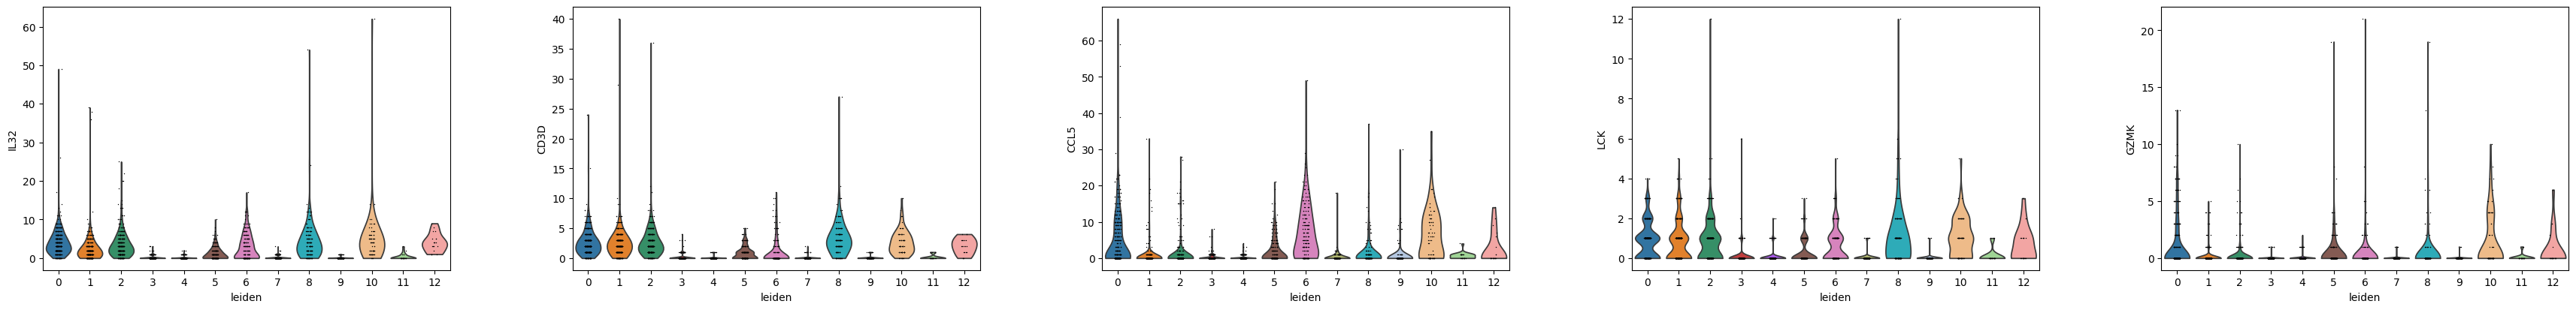

In [24]:
from typing import TypedDict, List, Dict, Any
from langgraph.graph import StateGraph, END
from langchain.chat_models import ChatOpenAI
from langchain.agents import Tool, initialize_agent
import scanpy as sc
import matplotlib.pyplot as plt

# --- Dummy report structure ---
report_log = []
def add_to_report(title: str, description: str, image_paths: list[str] = None):
    md = f"## {title}\n\n{description}\n"
    if image_paths:
        for path in image_paths:
            md += f"![{path}]({path})\n"
    report_log.append(md)

# --- Dummy AnnData setup (replace with your real file) ---
adata = sc.datasets.pbmc3k()  # Or sc.read("path_to_file.h5ad")

# --- Tools ---
def run_basic_qc(_: str) -> str:
    sc.pp.calculate_qc_metrics(adata, inplace=True)
    return "Basic QC metrics computed."

def run_louvain_clustering(_: str) -> str:
    sc.pp.pca(adata)
    sc.pp.neighbors(adata)
    sc.tl.louvain(adata)
    return "Louvain clustering completed and stored in adata.obs['louvain']."

def run_leiden_clustering(_: str) -> str:
    sc.pp.pca(adata)
    sc.pp.neighbors(adata)
    sc.tl.leiden(adata)
    return "Leiden clustering completed and stored in adata.obs['leiden']."

def find_differentially_expressed_genes(_: str) -> str:
    if "leiden" not in adata.obs:
        return "Error: 'leiden' clusters not found. Please run Leiden clustering first."
    sc.tl.rank_genes_groups(adata, groupby="leiden", method="t-test")
    return "DGE computed using t-test, grouped by leiden clusters."

def plot_marker_expression(_: str) -> str:
    if "rank_genes_groups" not in adata.uns:
        return "Error: No ranked genes found. Please run DGE first."
    top_genes = adata.uns['rank_genes_groups']['names']['0'][:5]
    sc.pl.violin(adata, keys=top_genes, groupby="leiden", show=False)
    plt.savefig("marker_expression.png")
    return "Marker expression plot saved."

# --- Tools as LangChain Tools ---
def with_reporting(tool_func, name):
    def wrapped(input_str):
        result = tool_func(input_str)
        interpretation = f"Tool `{name}` was run. Output: {result}. What does this result mean?"
        add_to_report(name, interpretation)
        return result
    return wrapped

tool_list = [
    Tool(name="run_basic_qc", func=with_reporting(run_basic_qc, "run_basic_qc"), description="Run basic QC on the data"),
    Tool(name="run_leiden_clustering", func=with_reporting(run_leiden_clustering, "run_leiden_clustering"), description="Compute PCA, neighbors, and Leiden clusters"),
    Tool(name="find_differentially_expressed_genes", func=with_reporting(find_differentially_expressed_genes, "find_differentially_expressed_genes"), description="Compute differentially expressed genes grouped by Leiden cluster"),
    Tool(name="plot_marker_expression", func=with_reporting(plot_marker_expression, "plot_marker_expression"), description="Plot expression of marker genes from DGE results"),
]

# --- Define State Schema ---
class AgentState(TypedDict):
    messages: List[Dict[str, Any]]

# --- LLM Agent Node ---
llm = ChatOpenAI(model="gpt-4", temperature=0)

def agent_node(state: AgentState) -> AgentState:
    history = state.get("messages", [])
    task = history[-1]['content']

    agent = initialize_agent(tool_list, llm, agent_type="zero-shot-react-description", verbose=True)
    result = agent.run(task)

    return {"messages": history + [{"role": "agent", "content": result}]}

# --- Build Graph ---
builder = StateGraph(AgentState)
builder.add_node("Agent", agent_node)
builder.set_entry_point("Agent")
builder.set_finish_point("Agent")
graph = builder.compile()

# --- Run Agent ---
query = "Identify biomarkers and DGEs in these data about Keloids"
initial_state = {"messages": [{"role": "user", "content": query}]}
final_state = graph.invoke(initial_state)

# --- View Result ---
final_state["messages"][-1]["content"]


In [25]:
report_log

['## run_basic_qc\n\nTool `run_basic_qc` was run. Output: Basic QC metrics computed.. What does this result mean?\n',
 "## run_leiden_clustering\n\nTool `run_leiden_clustering` was run. Output: Leiden clustering completed and stored in adata.obs['leiden'].. What does this result mean?\n",
 '## find_differentially_expressed_genes\n\nTool `find_differentially_expressed_genes` was run. Output: DGE computed using t-test, grouped by leiden clusters.. What does this result mean?\n',
 '## plot_marker_expression\n\nTool `plot_marker_expression` was run. Output: Marker expression plot saved.. What does this result mean?\n']

In [18]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.louvain(adata)

ModuleNotFoundError: No module named 'louvain'

In [17]:
adata.obs

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes
index,,,,,,,,
AAACATACAACCAC-1,781,6.661855,2421.0,7.792349,47.748864,63.279637,74.969021,88.393226
AAACATTGAGCTAC-1,1352,7.210080,4903.0,8.497807,45.502753,61.023863,71.813176,82.622884
AAACATTGATCAGC-1,1131,7.031741,3149.0,8.055158,41.314703,53.794856,65.449349,79.961893
AAACCGTGCTTCCG-1,960,6.867974,2639.0,7.878534,39.029936,52.898825,66.691929,82.569155
AAACCGTGTATGCG-1,522,6.259581,981.0,6.889591,44.852192,55.657492,67.176351,97.757390
...,...,...,...,...,...,...,...,...
TTTCGAACTCTCAT-1,1155,7.052721,3461.0,8.149602,39.237215,52.528171,65.761341,81.074834
TTTCTACTGAGGCA-1,1227,7.113142,3447.0,8.145550,37.278793,51.900203,63.881636,78.909196
TTTCTACTTCCTCG-1,622,6.434547,1684.0,7.429521,45.783848,61.638955,74.940618,92.755344


In [14]:
adata

AnnData object with n_obs × n_vars = 2700 × 32738
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'pca', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [12]:
DATAPATH = "/nfs/turbo/umms-indikar/Joshua/differentialExpression/GSE243716/"
data_file = os.path.join(DATAPATH, "keloids.h5ad")
adata = sc.read(data_file)
adata

/home/jpic/.local/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 25855 × 36601
    obs: 'sample'

In [4]:
import scanpy as sc
import matplotlib.pyplot as plt

def run_basic_qc(adata):
    sc.pp.calculate_qc_metrics(adata, inplace=True)
    return "Basic QC metrics computed."

def find_differentially_expressed_genes(adata, groupby_key='cell_type'):
    sc.tl.rank_genes_groups(adata, groupby=groupby_key, method='t-test')
    return "DGE computed using t-test."

def plot_marker_expression(adata, n_genes=5, groupby_key='cell_type'):
    top_genes = adata.uns['rank_genes_groups']['names'][groupby_key][:n_genes]
    sc.pl.violin(adata, keys=top_genes, groupby=groupby_key, show=False)
    plt.savefig("marker_expression.png")
    return "Marker expression plot saved."


In [7]:
import os
from langchain.chat_models import ChatOpenAI
from langchain.agents import Tool
from langgraph.graph import StateGraph, END
# from tools import run_basic_qc, find_differentially_expressed_genes, plot_marker_expression
import scanpy as sc

# Load AnnData
DATAPATH = "/nfs/turbo/umms-indikar/Joshua/differentialExpression/GSE243716/"
data_file = os.path.join(DATAPATH, "keloids.h5ad")
adata = sc.read(data_file)

# Wrap tools
tool_list = [
    Tool(name="run_basic_qc", func=lambda x: run_basic_qc(adata), description="Basic QC"),
    Tool(name="find_differentially_expressed_genes", func=lambda x: find_differentially_expressed_genes(adata), description="Find DGEs grouped by cell type"),
    Tool(name="plot_marker_expression", func=lambda x: plot_marker_expression(adata), description="Plot top marker gene expression")
]

# LLM
llm = ChatOpenAI(temperature=0, model="gpt-4")

# Agent Node
def agent_node(state):
    history = state.get("messages", [])
    task = history[-1]['content']

    # You can change this to use langchain.agents.initialize_agent() if you want
    from langchain.agents import initialize_agent
    agent = initialize_agent(tool_list, llm, agent_type="zero-shot-react-description", verbose=True)
    
    result = agent.run(task)
    return {"messages": history + [{"role": "agent", "content": result}]}

# Graph
def build_graph():
    builder = StateGraph()
    builder.add_node("Agent", agent_node)
    builder.set_entry_point("Agent")
    builder.set_finish_point("Agent", END)
    return builder.compile()


/home/jpic/.local/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/tmp/ipykernel_430551/4216333534.py:21: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  llm = ChatOpenAI(temperature=0, model="gpt-4")


In [8]:
graph = build_graph()

query = "Identify biomarkers and DGEs in these data about Keloids"
state = {"messages": [{"role": "user", "content": query}]}

final_state = graph.invoke(state)
print("\n=== Final Result ===")
print(final_state["messages"][-1]["content"])


TypeError: StateGraph.__init__() missing 1 required positional argument: 'state_schema'

In [1]:
import langgraph

In [3]:
from langgraph.prebuilt import create_react_agent

def search(query: str):
    """Call to surf the web."""
    if "sf" in query.lower() or "san francisco" in query.lower():
        return "It's 60 degrees and foggy."
    return "It's 90 degrees and sunny."

agent = create_react_agent("anthropic:claude-3-7-sonnet-latest", tools=[search])
agent.invoke(
    {"messages": [{"role": "user", "content": "what is the weather in sf"}]}
)


AttributeError: 'str' object has no attribute 'bind_tools'

# Single Cell Analysis